DATA SCIENCE (UCS538) Lab Assignment 6

Vernica Beohar     101903182     COE7

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Q1

iris=pd.read_csv("/content/iris_01.csv",index_col=0)
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class,Predicted_class
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0
...,...,...,...,...,...,...
145,0.0,3.0,5.2,2.3,2,2
146,6.3,2.5,5.0,1.9,2,2
147,6.5,3.0,5.2,2.0,2,2
148,6.2,0.0,5.4,2.3,2,0


In [ ]:
# REPLACING 0 VALUES WITH NaN
arr1=np.array(iris.iloc[:,:4])
arr2=np.array(iris.iloc[:,4:6])
iris_split=pd.DataFrame(data=arr1)
iris_split.replace(to_replace=0,value=np.nan,inplace=True)
arr1=np.array(iris_split)
arr1=np.append(arr1,arr2,axis=1)
df1=pd.DataFrame(data=arr1,columns=iris.columns)
df1

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class,Predicted_class
0,5.1,3.5,1.4,0.2,0.0,0.0
1,4.9,3.0,1.4,0.2,0.0,0.0
2,4.7,3.2,1.3,0.2,0.0,0.0
3,4.6,3.1,1.5,0.2,0.0,0.0
4,5.0,3.6,1.4,0.2,0.0,0.0
...,...,...,...,...,...,...
145,NaN,3.0,5.2,2.3,2.0,2.0
146,6.3,2.5,5.0,1.9,2.0,2.0
147,6.5,3.0,5.2,2.0,2.0,2.0
148,6.2,NaN,5.4,2.3,2.0,0.0


In [ ]:
df1.isna().sum()

sepal length (cm)    13
sepal width (cm)      6
petal length (cm)     5
petal width (cm)      6
Class                 0
Predicted_class       0
dtype: int64

In [ ]:
# (i) FILL MISSING VALUES WITH MEAN
for col in (df1.columns[:4]):
  mean_val=df1[col].mean(skipna=True)
  df1[col].fillna(mean_val,inplace=True)
#df1

In [ ]:
# (ii) FILL MISSING VALUES WITH MEDIAN
for col in (df1.columns[:4]):
  median_val=df1[col].median(skipna=True)
  df1[col].fillna(median_val,inplace=True)
#df1

In [ ]:
# (iii) FILL MISSING VALUES WITH MODE
for col in (df1.columns[:4]):
  mode_val=df1[col].mode()[0]
  df1[col].fillna(mode_val,inplace=True)
#df1

In [ ]:
# (iv) FILL MISSING VALUES WITH MINIMUM
for col in (df1.columns[:4]):
  mode_val=df1["sepal length (cm)"].min()
  df1[col].fillna(mode_val,inplace=True)
#df1

In [ ]:
# (v) FILL MISSING VALUES WITH MAXIMUM
for col in (df1.columns[:4]):
  mode_val=df1["sepal length (cm)"].max()
  df1[col].fillna(mode_val,inplace=True)
#df1

In [ ]:
#Q2

Y_act=np.array(df1["Class"])
Y_pred=np.array(df1["Predicted_class"])
confusion=pd.crosstab(df1['Class'], df1['Predicted_class'], rownames=['Actual'], colnames=['Predicted'])
confusion

Predicted,0.0,1.0,2.0
Actual,,,
0.0,46,2,2
1.0,0,45,5
2.0,2,4,44


In [ ]:
# SETOSA class
tp=0
tn=0
fn=0
fp=0
tp=confusion[0][0]
for i in [1,2]:
  for j in [1,2]:
    tn+=confusion[j][i]
for i in [1,2]:
  fp+=confusion[0][i]
for i in [1,2]:
  fn+=confusion[i][0]
precision=tp/(tp+fp)
recall=tp/(tp+fn)
print("TPR for setosa class :",tp/(tp+fn))
print("TNR for setosa class :",tn/(fp+tn))
print("FNR for setosa class :",fn/(tp+fn))
print("FPR for setosa class :",fp/(fp+tn))
print("ACCURACY SCORE :",(tp+tn)/(tp+tn+fp+fn))
print("F- 1 score :",2*(precision*recall)/(precision+recall))
print("Taking diffrent values for beta :")
beta_val=[0.5,2,7,5,10]
for i in beta_val:
  print("F-",i,"score :",(1+i*i)*(precision*recall)/((i*i*precision)+recall))

TPR for setosa class : 0.92
TNR for setosa class : 0.98
FNR for setosa class : 0.08
FPR for setosa class : 0.02
ACCURACY SCORE : 0.96
F- 1 score : 0.9387755102040817
Taking diffrent values for beta :
F- 0.5 score : 0.9504132231404958
F- 2 score : 0.9274193548387095
F- 7 score : 0.9207365892714171
F- 5 score : 0.921417565485362
F- 10 score : 0.920364500792393


In [ ]:
# VERSICOLOR class
tp=0
tn=0
fn=0
fp=0
tp=confusion[1][1]
for i in [0,2]:
  for j in [0,2]:
    tn+=confusion[j][i]
for i in [0,2]:
  fn+=confusion[i][1]
for i in [0,2]:
  fp+=confusion[1][i]
precision=tp/(tp+fp)
recall=tp/(tp+fn)
print("TPR for versicolor class :",tp/(tp+fn))
print("TNR for versicolor class :",tn/(fp+tn))
print("FNR for versicolor class :",fn/(tp+fn))
print("FPR for versicolor class :",fp/(fp+tn))
print("ACCURACY SCORE :",(tp+tn)/(tp+tn+fp+fn))
print("F- 1 score :",2*(precision*recall)/(precision+recall))
print("Taking diffrent values for beta :")
beta_val=[0.5,2,7,5,10]
for i in beta_val:
  print("F-",i,"score :",(1+i*i)*(precision*recall)/((i*i*precision)+recall))

TPR for versicolor class : 0.9
TNR for versicolor class : 0.94
FNR for versicolor class : 0.1
FPR for versicolor class : 0.06
ACCURACY SCORE : 0.9266666666666666
F- 1 score : 0.8910891089108911
Taking diffrent values for beta :
F- 0.5 score : 0.8858267716535432
F- 2 score : 0.8964143426294819
F- 7 score : 0.899640143942423
F- 5 score : 0.8993082244427363
F- 10 score : 0.8998218174618886


In [ ]:
# VIRGINICA class
tp=0
tn=0
fn=0
fp=0
tp=confusion[2][2]
for i in [0,1]:
  for j in [0,1]:
    tn+=confusion[j][i]
for i in [0,1]:
  fp+=confusion[2][i]
for i in [0,1]:
  fn+=confusion[i][2]
precision=tp/(tp+fp)
recall=tp/(tp+fn)
print("TPR for virginica class :",tp/(tp+fn))
print("TNR for virginica class :",tn/(fp+tn))
print("FNR for virginica class :",fn/(tp+fn))
print("FPR for virginica class :",fp/(fp+tn))
print("ACCURACY SCORE :",(tp+tn)/(tp+tn+fp+fn))
print("F- 1 score :",2*(precision*recall)/(precision+recall))
print("Taking diffrent values for beta :")
beta_val=[0.5,2,7,5,10]
for i in beta_val:
  print("F-",i,"score :",(1+i*i)*(precision*recall)/((i*i*precision)+recall))

TPR for virginica class : 0.88
TNR for virginica class : 0.93
FNR for virginica class : 0.12
FPR for virginica class : 0.07
ACCURACY SCORE : 0.9133333333333333
F- 1 score : 0.8712871287128714
Taking diffrent values for beta :
F- 0.5 score : 0.8661417322834646
F- 2 score : 0.8764940239043825
F- 7 score : 0.8796481407437025
F- 5 score : 0.8793235972328979
F- 10 score : 0.8798257770738468


In [ ]:
#Q3

# Making setosa class as positive and rest of the classes as negative
target=iris.iloc[:,4:6]
for i in target.columns:
  for j in range(len(target)):
    if target[i][j]!=0:
      target[i][j]=-1
confusion=pd.crosstab(target['Class'], target['Predicted_class'], rownames=['Actual'], colnames=['Predicted'])
confusion=np.array(confusion)
tp=confusion[1][1]
tn=confusion[0][0]
fn=confusion[1][0]
fp=confusion[0][1]
print("ACCURACY SCORE :",(tp+tn)/(tp+tn+fp+fn))

ACCURACY SCORE : 0.96


In [ ]:
# Making Versicolor class as positive and rest of the classes as negative
target=iris.iloc[:,4:6]
for i in target.columns:
  for j in range(len(target)):
    if target[i][j]!=1:
      target[i][j]=-1
confusion=pd.crosstab(target['Class'], target['Predicted_class'], rownames=['Actual'], colnames=['Predicted'])
confusion=np.array(confusion)
tp=confusion[1][1]
tn=confusion[0][0]
fn=confusion[1][0]
fp=confusion[0][1]
print("ACCURACY SCORE :",(tp+tn)/(tp+tn+fp+fn))

ACCURACY SCORE : 0.9266666666666666


In [ ]:
# Making Virginica class as positive and rest of the classes as negative
target=iris.iloc[:,4:6]
for i in target.columns:
  for j in range(len(target)):
    if target[i][j]!=2:
      target[i][j]=-1
confusion=pd.crosstab(target['Class'], target['Predicted_class'], rownames=['Actual'], colnames=['Predicted'])
confusion=np.array(confusion)
tp=confusion[1][1]
tn=confusion[0][0]
fn=confusion[1][0]
fp=confusion[0][1]
print("ACCURACY SCORE :",(tp+tn)/(tp+tn+fp+fn))

ACCURACY SCORE : 0.9133333333333333


In [ ]:
#Q4

# Normalizing using Min-Max Scaler
for i in range(len(df1.columns)-2):
  mx=df1.iloc[:,i].max()
  mn=df1.iloc[:,i].min()
  for j in range(len(df1)):
    df1.iloc[j][i]=(df1.iloc[j][i]-mn)/(mx-mn)
df1.to_csv("normalized_file.csv")

In [ ]:
#Q5

X=np.array(df1.iloc[:,:4])
features=X.T
cov_matrix=np.cov(features)
print("Covariance matrix :")
print(cov_matrix)
values, vectors=np.linalg.eig(cov_matrix)
print("\nEigen values :")
print(values[:5])
print("\nEigen vectors :")
print(vectors[:5])

Covariance matrix :
[[ 0.04760265 -0.00401611  0.0498402   0.05168033]
 [-0.00401611  0.03671246 -0.02523812 -0.02299838]
 [ 0.0498402  -0.02523812  0.08595258  0.08476252]
 [ 0.05168033 -0.02299838  0.08476252  0.09615771]]

Eigen values :
[0.21414162 0.03581036 0.01110677 0.00536664]

Eigen vectors :
[[-0.39297383  0.47047405  0.75322247  0.23849873]
 [ 0.18190813  0.8796852  -0.39122818 -0.20000975]
 [-0.62075763 -0.0651232  -0.03606362 -0.78046034]
 [-0.65356022  0.0238136  -0.52753753  0.54221408]]


In [ ]:
pc1=X.dot(vectors.T[0])
pc2=X.dot(vectors.T[1])
res=pd.DataFrame(pc1,columns=["PC1"])
res["PC2"]=pc2
res.head()

,PC1,PC2
0,-0.049153,0.620941
1,-0.068664,0.394875
2,-0.019774,0.449813
3,-0.038169,0.394551
4,-0.029969,0.647858


In [ ]:
#Q6

ndf=pd.read_csv("/content/Boston_Housing_01.csv")
ndf

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,Predicted
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,27.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,22.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,32.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,32.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,34.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4,21.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6,19.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9,24.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0,19.0


Correlation visualisation using heatmap -


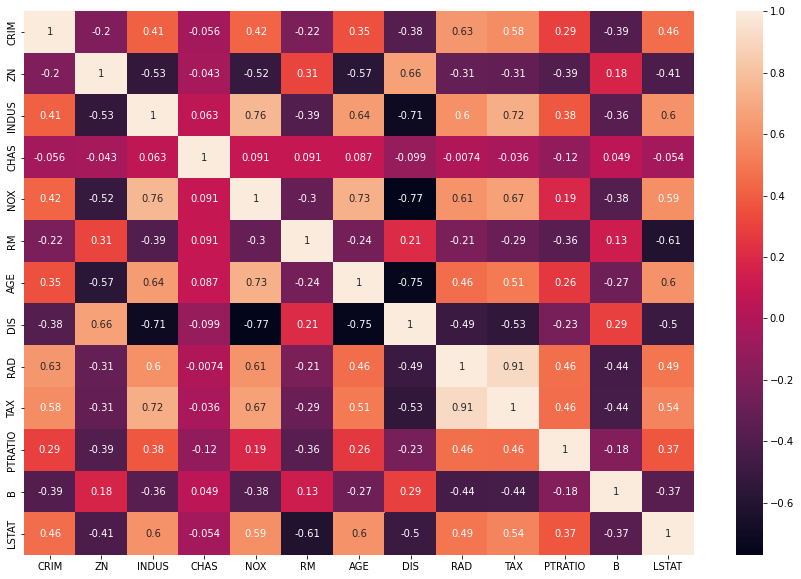

In [ ]:
ndf1=ndf.iloc[:,:13]
print("Correlation visualisation using heatmap -")
plt.figure(figsize=(15,10))
sns.heatmap(ndf1.corr(),annot=True)
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
print("Mean Squared Error :",end=" ")
mse=mean_squared_error(ndf['MEDV'], ndf['Predicted'])
print(mse)

print("\nRoot Mean Squared Error :",np.sqrt(mse))

ndf['diff']=abs(ndf['MEDV']-ndf['Predicted'])
ndf["correct"]=np.nan

for i in range(len(ndf)):
  if ndf['diff'][i]<1:
    ndf['correct'][i]=1

print("\nAccuracy : ",ndf['correct'].sum()/506)
print("\n")

Mean Squared Error : 3.964426877470356

Root Mean Squared Error : 1.9910868583440442

Accuracy :  0.15019762845849802




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
